In [1]:
import pandas as pd


In [9]:
df = pd.read_csv('/content/SMSSpamCollection', sep='\t',header=None, names=['label', 'sms_message'])
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


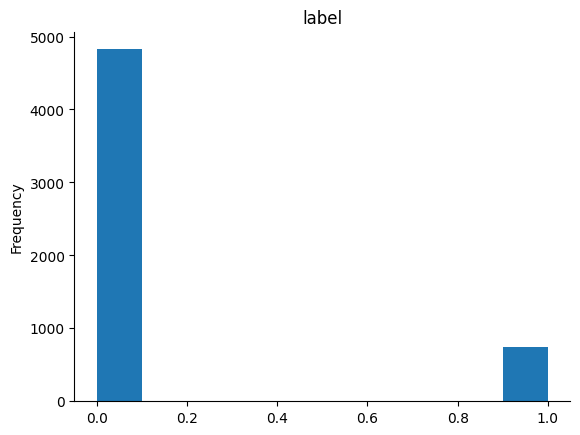

In [64]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
from sklearn.model_selection import train_test_split

X = df['sms_message']
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [50]:
count_vector = CountVectorizer()

training_Data = count_vector.fit_transform(X_train)
testing_Data = count_vector.transform(X_test)

Naive Bayes implementation using scikit-learn

In [51]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_Data, y_train)

MultinomialNB()

In [53]:
predictions = naive_bayes.predict(testing_Data)

In [54]:
print(predictions)

[0 0 0 ... 0 0 0]


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9902120717781403


In [58]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))

0.9155298332644344
0.009787928221859706


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Precision score:  0.975
Recall score:  0.9512195121951219
F1 score:  0.9629629629629629


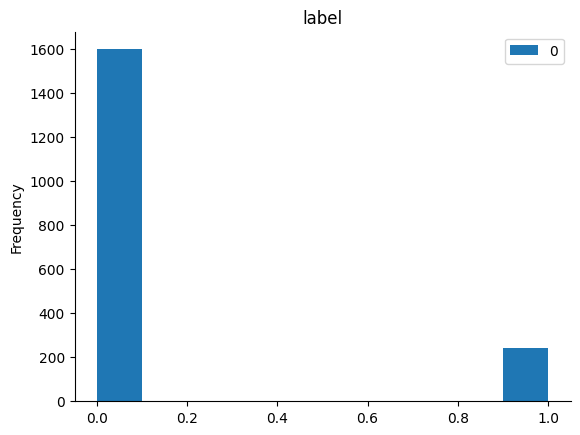

In [67]:
prediction = pd.DataFrame(predictions)
prediction.plot(kind='hist', title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)


_______________________________________________________________________


________________________________________________________________________

Implementing Bag of Words from scratch(not used)

In [11]:
# Convert all the strings in the documents set to their lower case.
lower_case_documents = []
for i in df['sms_message']:
  lower_case_documents.append(i.lower())
print(lower_case_documents)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though", "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv", 'even my brother is not like to speak with me. they treat me like aids patent.', "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune", 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.', 'had your mobile 

In [12]:
import string
sans_punctuation_documents = []
for i in lower_case_documents:
  sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation_documents)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat', 'ok lar joking wif u oni', 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s', 'u dun say so early hor u c already then say', 'nah i dont think he goes to usf he lives around here though', 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send £150 to rcv', 'even my brother is not like to speak with me they treat me like aids patent', 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune', 'winner as a valued network customer you have been selected to receivea £900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only', 'had your mobile 11 months or more u r entitled to update to the lat

In [13]:
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print(preprocessed_documents)

[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', '£150', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent'], ['as', 'pe

In [14]:
frequency_list = []
from collections import Counter

for i in preprocessed_documents:
    frequency_list.append(Counter(i))

print(frequency_list)

[Counter({'go': 1, 'until': 1, 'jurong': 1, 'point': 1, 'crazy': 1, 'available': 1, 'only': 1, 'in': 1, 'bugis': 1, 'n': 1, 'great': 1, 'world': 1, 'la': 1, 'e': 1, 'buffet': 1, 'cine': 1, 'there': 1, 'got': 1, 'amore': 1, 'wat': 1}), Counter({'ok': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'u': 1, 'oni': 1}), Counter({'to': 3, 'entry': 2, 'fa': 2, 'free': 1, 'in': 1, '2': 1, 'a': 1, 'wkly': 1, 'comp': 1, 'win': 1, 'cup': 1, 'final': 1, 'tkts': 1, '21st': 1, 'may': 1, '2005': 1, 'text': 1, '87121': 1, 'receive': 1, 'questionstd': 1, 'txt': 1, 'ratetcs': 1, 'apply': 1, '08452810075over18s': 1}), Counter({'u': 2, 'say': 2, 'dun': 1, 'so': 1, 'early': 1, 'hor': 1, 'c': 1, 'already': 1, 'then': 1}), Counter({'he': 2, 'nah': 1, 'i': 1, 'dont': 1, 'think': 1, 'goes': 1, 'to': 1, 'usf': 1, 'lives': 1, 'around': 1, 'here': 1, 'though': 1}), Counter({'to': 2, 'freemsg': 1, 'hey': 1, 'there': 1, 'darling': 1, 'its': 1, 'been': 1, '3': 1, 'weeks': 1, 'now': 1, 'and': 1, 'no': 1, 'word': 1, 'back': 1, '

Now that we have implemented the BoW concept from scratch, let's go ahead and use scikit-learn to do this process in a clean and succinct way.

In [15]:
# not usedd !!!!
from sklearn.feature_extraction.text import CountVectorizer
counter_vector = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = '(?u)\\b\\w\\w+\\b')
#The token_pattern parameter has a default regular expression value of (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


Bayes Theorem implementation from scratch
(not used)

P(Pos) = [P(D) * Sensitivity] + [P(~D) * (1-Specificity))]

In [43]:
# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 0.99

# Sensitivity or P(Pos|D)
p_pos_diabetes = 0.9

# Specificity or P(Neg/~D)
p_neg_no_diabetes = 0.

p_pos = (p_diabetes * p_pos_diabetes) + (p_no_diabetes * (1 - p_neg_no_diabetes))
print('The probability of getting a positive test result P(Pos) is: {}',format(p_pos))

p_diabetes_pos = (p_diabetes * p_pos_diabetes) / p_pos
print('Probability of an individual having diabetes, given that that individual got a positive test result is:\
',format(p_diabetes_pos))

The probability of getting a positive test result P(Pos) is: {} 0.999
Probability of an individual having diabetes, given that that individual got a positive test result is: 0.00900900900900901
